Load data from http://media.wiley.com/product_ancillary/6X/11186614/DOWNLOAD/ch02.zip, WineKMC.xlsx

In [108]:
# code written in py_3.0

import pandas as pd
import numpy as np

df_sales = pandas.read_excel(open('C:/Users/craigrshenton/Desktop/Dropbox/excel_data_sci/ch02/WineKMC.xlsx','rb'), sheetname=1)
df_sales.columns = ['name', 'offer']
df_sales.head()

,name,offer
0,Smith,2
1,Smith,24
2,Johnson,17
3,Johnson,24
4,Johnson,26


In [109]:
# get list unique customer names
names = df_sales.name.unique()
names

array(['Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Miller', 'Davis',
       'Garcia', 'Rodriguez', 'Wilson', 'Martinez', 'Anderson', 'Taylor',
       'Thomas', 'Hernandez', 'Moore', 'Martin', 'Jackson', 'Thompson',
       'White', 'Lopez', 'Lee', 'Gonzalez', 'Harris', 'Clark', 'Lewis',
       'Robinson', 'Walker', 'Perez', 'Hall', 'Young', 'Allen', 'Sanchez',
       'Wright', 'King', 'Scott', 'Green', 'Baker', 'Adams', 'Nelson',
       'Hill', 'Ramirez', 'Campbell', 'Mitchell', 'Roberts', 'Carter',
       'Phillips', 'Evans', 'Turner', 'Torres', 'Parker', 'Collins',
       'Edwards', 'Stewart', 'Flores', 'Morris', 'Nguyen', 'Murphy',
       'Rivera', 'Cook', 'Rogers', 'Morgan', 'Peterson', 'Cooper', 'Reed',
       'Bailey', 'Bell', 'Gomez', 'Kelly', 'Howard', 'Ward', 'Cox', 'Diaz',
       'Richardson', 'Wood', 'Watson', 'Brooks', 'Bennett', 'Gray',
       'James', 'Reyes', 'Cruz', 'Hughes', 'Price', 'Myers', 'Long',
       'Foster', 'Sanders', 'Ross', 'Morales', 'Powell', 'Sulli

In [110]:
id = df_names.index+1 # give each name a unique id number
id = id.unique()
id

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
             14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
             27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
             40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
             53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
             66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
             79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
             92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64')

In [111]:
id_dict = dict(zip(names, id))
df_sales['id']=df_sales.name.map(id_dict)
df_sales.head()

,name,offer,id
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,2
3,Johnson,24,2
4,Johnson,26,2


In [157]:
pivot = pandas.pivot_table(df_sales, index=["offer"], columns=["id"], aggfunc=len, fill_value='0')
pivot.index.name = None
pivot.columns = pivot.columns.get_level_values(1) # sets cols to product categories
X = pivot.as_matrix()
X = np.matrix(X)
X = X.astype(int)
X

matrix([[0, 0, 0, ..., 1, 0, 1],
        [1, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 1, 0, 1],
        [0, 0, 1, ..., 0, 1, 1],
        [0, 0, 0, ..., 0, 0, 0]])

In [156]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

dist_out = 1-pairwise_distances(X.T, metric="cosine")
dist_out

array([[ 1.        ,  0.40824829,  0.        , ...,  0.        ,
         0.        ,  0.26726124],
       [ 0.40824829,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.25819889,
         0.57735027,  0.43643578],
       ..., 
       [ 0.        ,  0.        ,  0.25819889, ...,  1.        ,
         0.2236068 ,  0.6761234 ],
       [ 0.        ,  0.        ,  0.57735027, ...,  0.2236068 ,
         1.        ,  0.37796447],
       [ 0.26726124,  0.        ,  0.43643578, ...,  0.6761234 ,
         0.37796447,  1.        ]])

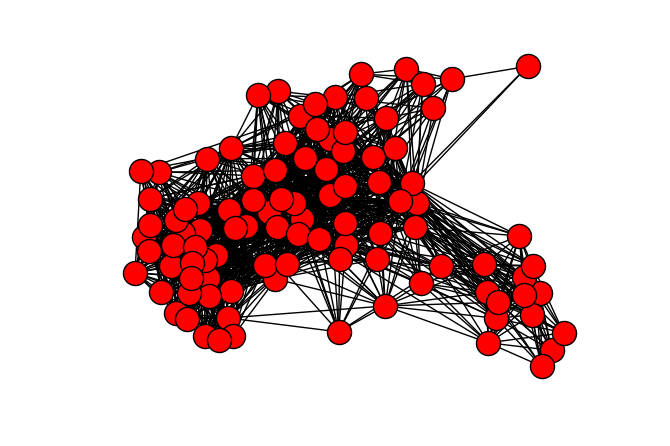

In [176]:
import networkx as nx
import matplotlib.pyplot as plt
G = G=nx.from_numpy_matrix(dist_out)
nx.draw(G)
plt.show()

In [170]:
degrees = sorted(nx.degree(G).values())